In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from typing import List

In [9]:
# reading the 0 Class dataset just to look at a file to see how data looks like.

file_dir = "../ML/data/ocr/0"

for i in os.listdir(file_dir):
    with open(os.path.join(file_dir,i)) as f:
        lines = f.readlines()
    break
lines

[' \n',
 '\n',
 'Aneto Pi eth Asin\n',
 '\n',
 ' \n',
 '\n',
 '15 Fieerih Sie, WW\n',
 'Washing, DEP,\n',
 '\n',
 'Mecvyn Sasser: MI\n',
 'Pvt In\n',
 '\n',
 'December 30, 1992\n',
 '\n',
 '‘Mr. Brennan M. Dawson\n',
 '\n',
 '‘The Tobacco Institute\n',
 '\n',
 '1875 I Street, NW\n',
 '\n',
 'Washington, DC 20006\n',
 '\n',
 "Re: #92/92L Leuter re: The Tobacco Institute's ‘I's the Law’ Campaign,\n",
 'Dear Mr. Dawson:\n',
 '\n',
 'This note acknowledges the receipt ofthe revised version of your paper.\n',
 '\n',
 'Please note that its number remains the same. You should refer to this number in all\n',
 '\n',
 'future correspondence or inquiries.\n',
 '\n',
 'Sincerely,\n',
 '\n',
 'Sabine J. Beisler\n',
 '‘Assistant Managing Editor\n',
 '\n',
 'T11370-1696\n',
 '\x0c']

In [73]:
# the function to collect the data

def data_collection(classes, data,labels):

    # iterating through each class
    for each_class in classes:
        file_dir = f"../ML/data/ocr/{each_class}/"

        for i in os.listdir(file_dir):
            with open(os.path.join(file_dir, i), 'r') as f:

                # removing the unwanted spaces from left and right
                lines = [line.strip() for line in f.readlines() if line.strip()]
                
                concatenated_lines = ' '.join(lines)
                data.append(concatenated_lines)
                labels.append(each_class)
        print(f"{each_class} label is done!!")
    print("Done!!")


In [74]:
# class labels
classes = [0,2,4,6,9]

data = []
labels = []

data_collection(classes=classes,data=data,labels=labels)

0 label is done!!
2 label is done!!
4 label is done!!
6 label is done!!
9 label is done!!
Done!!


In [121]:
df = pd.DataFrame({"Letters":data,"Target":labels})
df.head()

,Letters,Target
0,"Aneto Pi eth Asin 15 Fieerih Sie, WW Washing, ...",0
1,IDs PAGE 21729 Drenee ve eeepeneectnmnnnne Bas...,0
2,"PHILIP MORRIS wor 0b, 1977 < Senet tybieht laa...",0
3,"Gary L. Huber, M.D. Chief, Division of Resptra...",0
4,"THE TOBACCO INSTITUTE, INC 1776 K Street, Nort...",0


In [124]:
# shuffling the data
df = df.sample(frac=1).reset_index(drop=True)


In [108]:
# df.to_csv("text_dataset.csv",index=False)

In [119]:
df.head()

,Letters,Target
0,"2085114103 Qstern, Eric Oster, Erie ‘Tuesday, ...",2
1,"Advertising Age, oye TIMN 259668 , Sune 23, 19...",9
2,"“Clem Ban ips Cow, 1693 ot yt oe",0
3,8 Prognostic factors in childhood asthma: a lo...,6
4,"Suvpar, JUNE 5, 1994 onuaatyunnicis Cd, ee Ps ...",9


In [93]:
df.shape

(2500, 2)

In [83]:
df.head()

,Letters,Target
0,01338078 ‘neoH jo samranisay ul ‘sdnad8 jo Ara...,9
1,RR Interoffice Memorandum: ._ | Subject: Contr...,0
2,"PHILIP MORRIS AB. Translation ya Norrlandl, Sw...",9
3,,4
4,"2648770148 63 USA TODAY - WEDNESDAY, MARCH 1 P...",9


In [95]:
df.loc[3]["Letters"] == ""

True

In [122]:
# finding which column has empty string data.
empty_letters_index = []
for i in range(df.shape[0]):
    if (df.loc[i]["Letters"] == ""):
        empty_letters_index.append(i)

In [123]:
empty_letters_index

[68,
 1032,
 1044,
 1065,
 1067,
 1086,
 1089,
 1111,
 1112,
 1115,
 1128,
 1131,
 1148,
 1160,
 1166,
 1168,
 1172,
 1179,
 1183,
 1194,
 1203,
 1220,
 1235,
 1239,
 1242,
 1245,
 1249,
 1270,
 1274,
 1276,
 1292,
 1296,
 1304,
 1305,
 1320,
 1321,
 1330,
 1337,
 1341,
 1345,
 1373,
 1386,
 1397,
 1398,
 1405,
 1410,
 1419,
 1420,
 1424,
 1438,
 1444,
 1460,
 1492,
 1548,
 1555,
 1682,
 1920,
 2186,
 2231]

In [104]:
2500 - len(empty_letters_index)

2441

In [111]:
# dropping the empty data
df1 = df.drop(index=empty_letters_index,axis=0)

In [113]:
df1.shape

(2441, 2)

In [114]:
df1["Target"].value_counts()

Target
0    497
6    490
4    487
9    485
2    482
Name: count, dtype: int64

<Axes: xlabel='Target'>

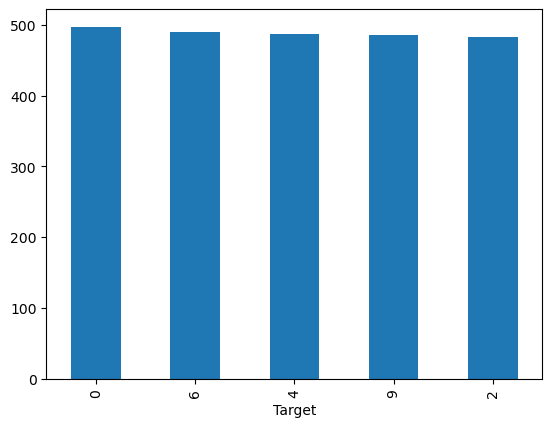

In [115]:
df1["Target"].value_counts().plot(kind='bar')